In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn import cross_validation
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import accuracy_score
import sqlite3
import itertools
from nltk.tokenize import word_tokenize
from nltk import pos_tag


In [74]:
AVG_RATING = 3.7

def get_mood_words(text):
    mood_tag_list = set(['JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBP', 'VBPZ'])
    mood_words = []
    tagged_words = pos_tag(word_tokenize(text))    
    for word, pos in tagged_words:        
        if pos in mood_tag_list:
            mood_words.append(word) 
    return mood_words

def load_data():
    data = []
    target = []
    conn = sqlite3.connect('C:/KJ/Temp/reviews.db')
    c = conn.cursor()
    for row in itertools.islice(c.execute('SELECT SNIPPET, RATING FROM REVIEWS WHERE SNIPPET IS NOT NULL AND RATING IS NOT NULL'),20000):
        snippet = row[0]        
        rating = row[1]
        if rating >=AVG_RATING+0.5:
            target.append('positive')
            #data.append(" ".join(get_mood_words(snippet)))
            data.append(snippet)
        elif rating<AVG_RATING-0.5:
            target.append('negative')
            #data.append(" ".join(get_mood_words(snippet)))
            data.append(snippet)
    return data, target

# preprocess creates the term frequency matrix for the review data set
def preprocess():
    data,target = load_data()
    count_vectorizer = CountVectorizer(binary='true')
    data = count_vectorizer.fit_transform(data)
    tfidf_data = TfidfTransformer(use_idf=False).fit_transform(data)
    return tfidf_data

def learn_model(data,target):
    # preparing data for split validation. 60% training, 40% test
    data_train,data_test,target_train,target_test = cross_validation.train_test_split(data,target,test_size=0.4,random_state=43)
    classifier = BernoulliNB().fit(data_train,target_train)
    classifier2 = LinearSVC().fit(data_train,target_train)
    classifier3 = SGDClassifier().fit(data_train,target_train)
    predicted = classifier.predict(data_test)
    predicted2 = classifier2.predict(data_test)
    predicted3 = classifier3.predict(data_test)
    evaluate_model(target_test,predicted)
    evaluate_model(target_test,predicted2)
    evaluate_model(target_test,predicted3)    

# read more about model evaluation metrics here
# http://scikit-learn.org/stable/modules/model_evaluation.html
def evaluate_model(target_true,target_predicted):
    print (classification_report(target_true,target_predicted))
    print ("The accuracy score is {:.2%}".format(accuracy_score(target_true,target_predicted)))

def main():
    data,target = load_data()
    print(len(data))
    tf_idf = preprocess()
    learn_model(tf_idf,target)


In [76]:
main()

6803
             precision    recall  f1-score   support

   negative       0.69      0.82      0.75      1539
   positive       0.69      0.52      0.59      1183

avg / total       0.69      0.69      0.68      2722

The accuracy score is 68.92%
             precision    recall  f1-score   support

   negative       0.71      0.76      0.73      1539
   positive       0.65      0.59      0.62      1183

avg / total       0.68      0.68      0.68      2722

The accuracy score is 68.44%
             precision    recall  f1-score   support

   negative       0.71      0.75      0.73      1539
   positive       0.65      0.60      0.62      1183

avg / total       0.68      0.68      0.68      2722

The accuracy score is 68.30%


19488
[159, 156, 156, 156, 153, 157, 153, 159, 153, 159, 158, 153, 158, 153, 158, 158, 158, 157, 153]


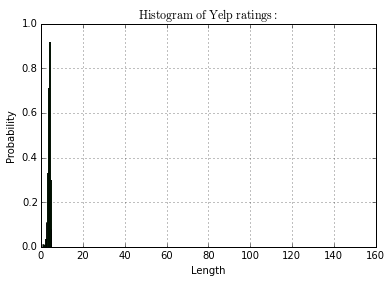

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

conn = sqlite3.connect('C:/KJ/Temp/reviews.db')
c = conn.cursor()
target = []
data = []
for row in itertools.islice(c.execute('SELECT SNIPPET, RATING FROM REVIEWS WHERE SNIPPET IS NOT NULL AND RATING IS NOT NULL'),20000):
    snippet = row[0]        
    rating = row[1]
    target.append(rating)
    data.append(len(snippet))

print (len(target))
print (data[1:20])

n, bins, patches = plt.hist(target, bins=10,normed=1, facecolor='green', alpha=0.75)
# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Rating')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Yelp\ ratings:}$')
plt.axis([0, 5, 0, 100])
plt.grid(True)

n, bins, patches = plt.hist(target, bins=10,normed=1, facecolor='green', alpha=0.75)
# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Length')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Yelp\ ratings:}$')
plt.axis([0, 160, 0, 1])
plt.grid(True)


